In [1]:
# Author: Zhengxiang (Jack) Wang 
# Date: 2021-08-03
# GitHub: https://github.com/jaaack-wang 
# About: Word Vectors and Word Senses for Stanford CS224N- NLP with Deep Learning | Winter 2019

# Table of Contents
- [1. Casual takeaways](#1)
- [2. Classification review and notation](#2)
    - [2.1 Inputs and labels](#2-1)
    - [2.2 Output models](#2-2)
    - [2.3 Objective/loss function and cross entropy](#2-3)
    - [2.4 Traditional ML classifier versus Neural Network Classifier](#2-4)
- [3. Neural Network Basics](#3)
    - [3.1 Neuron](#3-1)
    - [3.2 What an artificial neuron can do](#3-2)
    - [3.3 Matrix notation for a layer](#3-3)
- [4. Named Entity Recognition (NER)](#4)
    - [4.1 NER task](#4-1)
    - [4.2 Simple NER training methods](#4-2)
        - [4.2.1 Binary classification with averaged context words vectors](#4-2-1)
        - [4.2.2 Window classification using multi-class softmax classifier](#4-2-2)
        - [4.2.3 Binary classification with unnormalized scores using shallow neural network](#4-2-3)
    - [4.3 Challenges for NER](#4-3)
- [5. Gradients computation](#5)
    - [5.1 Partial derivatives and gradients](#5-1)
        - [5.1.1 Simple case: placed in a vector](#5-1-1)
        - [5.1.2 A more complex case: placed in a matrix -- Jacobian Matrix](#5-1-2)
    - [5.2 Multivariate calculus](#5-2)
        - [5.2.1 The chain rule](#5-2-1)
        - [5.2.2 Partial derivatives computation in Jacobian Matrix](#5-2-2)
        - [5.2.3 Shape convention](#5-2-3)
- [6. References](#6)

<a name='1'></a>
# 1. Casual takeaways

- This lecture is mostly about the neural net fundamentals.


- The slides for [this lecture video](https://www.youtube.com/watch?v=8CWyBNX6eDo&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=3) are in both the [Word Vectors 2 and Word Window Classification slide starting page 42](http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture02-wordvecs2.pdf) and the [Backprop and Neural Networks slide](http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture03-neuralnets.pdf). The original slide in the video has been restructured on the course video (which holds the 2021 version of the course).


- Cross-entropy loss is more convenient than negative log probability in terms of computation. 


- Manning said "baby information" (refer to cross entry among other things) "is about the amount of information theory" he knows. Interesting!


- Problems with the labelled data: 1. we do not have the labelled data; (labelled data are expensive and scarce) 2. the labels might not be easy for human raters to determine. 


- In general, classifying single words is rarely done

- There is a lot of inconsistency as to how people represent matrix calculus. Differnet conventions: numerator convention, denominator convention, shape convention. 

<a name='2'></a>
# 2. Classification review and notation

<a name='2-1'></a>
## 2.1 Inputs and labels


For any **supervised** classification tasks, you have inputs and expected outputs (labels), which can be denoted by 

$$\{x_{i}, y_{i}\}_{i=1}^{N}$$

where:

- $x_{i}$ are inputs, e.g., words (indices or vectors!), sentences, documents, etc.
- $y_{i}$ are labels (one of C classes) we try to predict, for example:
    - classes: sentiment (+/–), named entities, buy/sell decision
    - other words (such as in word2vec algorithms
    - multi-word sequences (e.g., Recurrent Neural Network, Machine Translation)
- $N$ is the sample size

<br>

<a name='2-2'></a>
## 2.2 Output models



<font color='blue'>\- Sigmoid function for binary classification:</font>

$$p(y|x) = \frac{1}{1 + exp(-\mathbf{w_y \cdot x})} \tag{1}$$

where:

- $\mathbf{w_y}$ is the weight vector used to predict $y$ (one of two classes): **in the right prediction cases**, if $y = 1$, then $p(y|x)$ should generally be greater than 0.5; if $y = 0$, then $p(y|x)$ should generally be less than 0.5.
- Manning does not provide this formula in the slide. This formula is written according to the way he writes the softmax formula down below.
- In this computation, $\mathbf{x}$ should be verctorized. 


<br>

<font color='blue'>\- Softmax function for multi-class classification:</font>

$$p(y|x) = \frac{exp(\mathbf{W_{y} \cdot x})}{\sum_{c=1}^{C} exp(\mathbf{W_{c} \cdot x})} \tag{2}$$
 

where:

- $\mathbf{W_y}$ is the $y_{th}$ row of the weight matirx $W$ used to predict $y$ (one of many classes): **in the right prediction cases**, the $\mathbf{W_y}$ should give the $y$ class the biggest share of probability among other classes (not necesssarily larger than 0.5).


- $\mathbf{W_y} \in \mathbb{R}^{C \times d}$ where $C$ denotes the total number of classes we have for prediction and $d$ denotes the dimension for each weight vector in the matrix. 


- $\sum_{c=1}^{C} exp(\mathbf{W_{c} \cdot x})$ normalizes the numerator, converts it into a probablity distribution and makes the sum of the probabilities of all classes equals 1.


- In this computation, $\mathbf{x}$ should also be verctorized. 


- To simplify the notation, we will use $f_{y}$ to denote $\mathbf{W_{y} \cdot x}$ and $f_{c}$ to denote $\mathbf{W_{c} \cdot x})$ so that (2) can be rewritten as:

$$p(y|x) = \frac{exp(f_y)}{\sum_{c=1}^{C} exp(f_c)} \tag{2}$$



<font color='blue'>Notes</font>

- We can also apply the sigmoid function multiply $C (> 2)$ times to get normalized probablity distribution for multi-classes whose sum equals 1:
    - In each iteration of the sigmoid function, we can take the class $c_i$ we want to predict as 1 and the rest 0 and run sigmoid function;
    - Then, we take the probability in each iteration for the class $c_i$ as the numerator and their sum as the denominator; 
    - Finally, we divide the numerator by the denominator and get the normalized probablity distribution for all classes. 
    - As a result of this multi-class logistic regression training, we will also have a weight matrix $\mathbf{W_y} \in \mathbb{R}^{C \times d}$.
    - Mathematically, softmax is a simplied version of this one-versus-all multi-class logistic regression.
    


<a name='2-3'></a>
## 2.3 Objective/loss function and cross entropy

For each training example $(x, y)$, we want to **maximize the probability of the correct class** y. We usually do this by **minizing the negative log probability of that class**:

$$\log p(y|x) - \log( \frac{exp(f_y)}{\sum_{c=1}^{C} exp(f_c)} ) \longrightarrow 0$$


However, a more convenient and common way to compute the loss function for both logsitic regression and softmax is **cross entroy**: 


$$H(p, q) = - \sum_{c=1}^{C}p(c)\log q(c) \tag{3}$$

where:

- $p$ is the true probability distribution 
- $q$ is the computed model probability 
- $H(p, q)$ denotes the cross entropy loss between p and q

<br>

**The reason why this can work is that: $p(c)$ will output 1 when $c$ is the true class to predict and 0 everywhere else such that the only term left will be the negative log probability of the true class.** In real computation, we usually verctorize both $p$ and $q$ as $\mathbf{y}$ (a one-hot vector) and $\hat y$ (the probability vector for all classes) so that (3) can be rewritten as:

$$H(\mathbf{y, \hat y}) = - \mathbf{y \cdot \log \hat y} \tag{4}$$

<br>

As we want to maximize the performance of our model over the entire dataset $\{x_{i}, y_{i}\}_{i=1}^{N}$, we will average the loss function illustrated in (3) and (4) accordingly: 


$$J(\theta) = \frac{1}{N} \sum_{i=1}^{N} - \log(\frac{exp({f_{y_i})}}{\sum_{c=1}^{C}exp({f_c})}) \tag{5}$$





<br>

<font color='blue'>Another question: why the negative log probability?</font>

- The negative log probability is actually closely related to the concept of **odd** in probability theory because it is just the logged odd.
    - to put it simply, the odd of $p$ to $q$ is just the ratio between them: $\frac{p}{q}$
    - if $p \approx q$, then $\frac{p}{q} \longrightarrow 1$
    - take the log of $\frac{p}{q}$, we get $\log \frac{p}{q} = \log q - \log q$. As $\frac{p}{q} \longrightarrow 1$, $\log q - \log q \longrightarrow 0$.
    - set $q = 1$, then $\log p = 0$, $\log q - \log q$ can then be simplified as $1 \times (0 - \log q) = q \log q$. 


- Geometrically, $-\log x \longrightarrow 0$ as $x \longrightarrow 1$ (predicting in the right direction) and $-\log x \longrightarrow +\infty$ as $x \longrightarrow 0$ (predicting in the wrong direction). You can see the visualization of the negative log probability below.

Text(0.5, 1.0, 'cross entropy loss illustration')

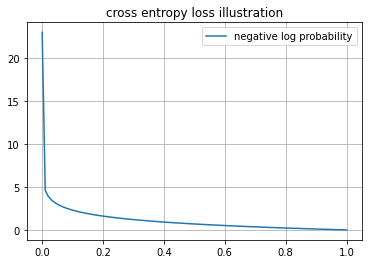

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1e-10, 1, 100)
plt.plot(x, -np.log(x), label='negative log probability')
plt.legend()
plt.grid(b=True)
plt.title('cross entropy loss illustration')

<a name='2-4'></a>
## 2.4 Traditional ML classifier versus Neural Network Classifier

In short, compared to the neural network classifier, the main problem with traditional ML classifier is it only has one layer of weights $W$ to train and the decision boundary is less flexible as a result of that (**not necessary alway linear if we can add polynomial terms**). 

<br>

<img src='../images/3-traditional-ml-optimization.png' width='600' height='300'>

<br>

<img src='../images/3-traditional-ml-optimization-problem.png' width='600' height='300'>

<br>

<img src='../images/3-neural-network-classifier-wins.png' width='600' height='300'>



<a name='3'></a>
# 3. Neural Network Basics

<a name='3-1'></a>
## 3.1 Neuron

Artificial neural network takes inspiration from the human neuron, which looks as follows:

<img src='../images/3-neuron-real.png' width='600' height='300'>

<br> 

The artificial neuron:
<img src='../images/3-neuron-artificial.png' width='600' height='300'>


<br>

<font color='blue'>Notes</font>

However, mathematically, I find it much easier to think of artificial neural network just a complicated composite function where the inputs for an (more) inner function comes from the outputs of an (more) outer function. Concretely, for our dataset $\{x_{i}, y_{i}\}_{i=1}^{N}$, we input $\{x_{i}\}_{i=1}^{N}$ and we get $\{y_{i}\}_{i=1}^{N}$. In between, the inputs $\{x_{i}\}_{i=1}^{N}$ can go through the following process before they get outputted as $\{\hat y_{i}\}_{i=1}^{N}$ (the following $\mathbf{x}$ and $\mathbf{y}$ are vectorized:

$$\mathbf{x} \longrightarrow \mathbf{A^{(1)}} = f^{(1)}(\mathbf{x}) \longrightarrow \mathbf{A^{(2)}} = f^{(2)}(\mathbf{A^{(1)}}) \rightarrow ... \rightarrow \mathbf{A^{(N-1)}} = f^{(N-1)}(\mathbf{A^{(N-2)}}) \longrightarrow \mathbf{\hat y} = f^{(N)}(\mathbf{A^{(N-1)}}) \longrightarrow \mathbf{\hat y} $$

Or:

$$\mathbf{\hat y} = f^{(N)}(f^{(N-1)}(...\longrightarrow f^{(2)}(f^{(1)}\mathbf(x))))$$


where $f = \mathbf{W} \cdot \mathbf{x} + \mathbf{b}$, $\mathbf{W}$ is the weight and $\mathbf{b}$ the bias term, both vectorized. $f$ is often called activation function and the interval between functions $f$ are known as layers. **Also note that the $f$ does not necessarily remain the same across different layers.**

<br>

<font color='blue'>**Neural network is just a mathematical trick, which is made possible by the availability of big data and the increasing computing power. Except that, there is nothing mysterious about it.**</font>  


<a name='3-2'></a>
## 3.2 What an artificial neuron can do

- As a binary logistic regression unit:

<img src='../images/3-neuron-as-binary-clf.png' width='600' height='300'>

<br>

- Construct a shallow neural network:

<img src='../images/3-neuron-to-shallow-nn.png' width='600' height='300'>



- Construct a more complicated or deeper neural network:

<img src='../images/3-neuron-to-deeper-nn.png' width='600' height='300'>

<br>

<img src='../images/3-neuron-to-deeper-nn-multilayers.png' width='600' height='300'>


- keep going ...

- Increases the power of neural network to do classification (much more flexible)

<img src='../images/3-power-of-nn-in-clf.png' width='600' height='300'>




<a name='3-3'></a>
## 3.3 Matrix notation for a layer

<img src='../images/3-matrix-notation-for-layers.png' width='600' height='300'>



<a name='4'></a>
# 4. Named Entity Recognition (NER)


<a name='4-1'></a>
## 4.1 NER task

<img src='../images/3-ner-about.png' width='600' height='300'>


<a name='4-2'></a>
## 4.2 Simple NER training methods

<br>

<a name='4-2-1'></a>
### 4.2.1 Binary classification with averaged context words vectors

- Recall the notes for lecture 2 where we learned two word2vec models. This is similar to the Continous Bag of Words model in that both use the context words to learn the center words.


- For the conetxt words, we can average them in order to get the averaged context vector to speed up training


- In general, classifying single words is rarely done

<img src='../images/3-simply-ner-binary.png' width='600' height='300'>
<img src='../images/3-simply-ner-binary-2.png' width='600' height='300'>

<br>

<a name='4-2-2'></a>
### 4.2.2 Window classification using multi-class softmax classifier

- unlike the previous, when using softmax, we will compute the probability distribution for all words in the window, not just the center word


- the goal is the make sure that the center word gets the highest probability score


- please note that, the following two slides are only available in the video, not on the website

<img src='../images/3-ner-clf-softmax.png' width='600' height='300'>

<img src='../images/3-ner-clf-softmax2.png' width='600' height='300'>

<br>


<a name='4-2-3'></a>
### 4.2.3 Binary classification with unnormalized scores using shallow neural network

- Related papers: [Collobert & Weston. 2008. A Unified Architecture for Natural Language Processing: Deep Neural Networks with Multitask Learning](https://thetalkingmachines.com/sites/default/files/2018-12/unified_nlp.pdf)


- Recall the notes for lecture 2 where we learned two word2vec models. This is similar to the Skip-gram model in that both have positive and negative samples. The difference is this mehod predicts the whole window as to whether there is a true center word in it. 


- the following five slides are only available in the video, not on the website

<img src='../images/3-simply-ner-binary-unnorm.png' width='600' height='300'>

<img src='../images/3-simply-ner-binary-unnorm2.png' width='600' height='300'>

<img src='../images/3-simply-ner-binary-unnorm3.jpg' width='600' height='300'>

<img src='../images/3-simply-ner-binary-unnorm4.png' width='600' height='300'>

<img src='../images/3-simply-ner-binary-unnorm5.png' width='600' height='300'>




<a name='4-3'></a>
## 4.3 Challenges for NER

- Ambiguity of the entity's boundary
- Ambiguity of entity itself
- Ambiguity of entity class (contextual)

<img src='../images/3-challenges-for-ner.png' width='700' height='300'>


<a name='5'></a>
# 5. Gradients computation

<font color='blue'>Notes: </font>Both the slide and the video are very casual about this part. I would recommend people take the [Introduction to Calculus](https://www.coursera.org/learn/introduction-to-calculus) course on Coursera to get started on calculus. That course will help beginners gain intuitions about calculus, although multivariate calculus and concepts like partial derivatives are not explored there. 

<a name='5-1'></a>
## 5.1 Partial derivatives and gradients

<a name='5-1-1'></a>
### 5.1.1 Simple case: placed in a vector

<font color='blue'>Notes: </font> The concept of partial derivatives is very important in deep learning as we will want to optimize the weights with regard to different variables. 

- $\partial$ stands for partial derivatives whereas $d$ stands for derivatives (non partial)
- When deriving partial derivatives, we usually take the variable of interest as variables and other non-interested variables as constant ($d=0$), similar to what we do in single variable calculus. For example, in $f = w_1 x_1 + w_2 x_2$, $\frac{\partial f}{\partial x_1} = w_1$, $\frac{\partial f}{\partial x_2} = w_2$. 
- A gradient is a vector of partial derivatives with respect to each variable. For example, in $f = w_1 x_1 + w_2 x_2$, $\frac{\partial f}{\partial x} = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} ]= [w_1, w_2]$.

<img src='../images/3-partial-derivatives.png' width='600' height='300'>

<a name='5-1-2'></a>
### 5.1.2 A more complex case: placed in a matrix -- Jacobian Matrix 

- This can be seen as placing $m$ row of gradients (partial derivatives stored as a vector, as in the simple case) to make a matrix. 
- Vectorization of gradients help speed up computation. 
- Jacobian Matrix is widely used in neural network backpropagation. 


<img src='../images/3-jacobian-matrix.png' width='600' height='300'>


<a name='5-2'></a>
## 5.2 Multivariate calculus

<a name='5-2-1'></a>
### 5.2.1 The chain rule

- General form of the chain rule: suppose $z = f(y)$, $y = f(x)$, $\frac{d z}{d x} = \frac{d z}{d y} \frac{d y}{d x} $. Remember to change the $d$ into $\partial$ if the variable to differentiate is only one of the many variables in a function.  
- Remember that $\frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \sum_{i=1}^{m} \sum_{j=1}^{n}\frac{f_{i}}{x_j}$ (I rewrite the formula given in the figure above to make it easier to understand),we take the partial derivatives variable by variable for each one of the functions $f$. So be careful with the order!
- Similarly, for the following chain rule example in Jacobian matrix, $\frac{\partial \mathbf{h}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{x}} = \sum_{i=1}^{m} \sum_{j=1}^{n}\frac{h_{i}}{z_j}\frac{z_{i}}{x_j}$. Therefore, in your result you should get a m by n Jacobian Matrix. (In the following slides, Manning make m = n, then the result becomes n by n dimensional)

<img src='../images/3-chain-rule.png' width='600' height='300'>

<br>

<a name='5-2-2'></a>
### 5.2.2 Partial derivatives computation in Jacobian Matrix
As I said in 5.1.1, when we take the partial derivative of variable of our interest, we only take that variable as variable and other variables as constants (meaning if we differentiate them by the variable of our interst, then the result is 0 because they are taken as constants), just like what we will do in single variable calculus. Formally, this can be expressed as the following:

$$(\frac{\partial h}{\partial z})_{ij} = \frac{\partial h_i}{\partial z_j} = \frac{\partial}{\partial z} h(z_i) $$

 $$ =  \left\{
\begin{array}{ll}
      f'(z_i)  & if \;\; i = j \\
      0  & if \;\; otherwise \\
\end{array} 
\right.  $$

<br>

**Examples**

$$\frac{\partial}{\partial \mathbf{x}} \mathbf{Wx + b} = \mathbf{W}$$

$$\frac{\partial}{\partial \mathbf{b}} \mathbf{Wx + b} = \mathbf{I}$$

where $\mathbf{I}$ is Identity matrix. 

$$\frac{\partial}{\partial \mathbf{u}} \mathbf{u^{T}h} = \mathbf{h^{T}}$$ 

however, by “shape convention” (see below), we usually write $\mathbf{h^{T}}$ as $\mathbf{h}$ in practice (because $\mathbf{h}$ is a row vector and we want to update $\mathbf{h}$ here. It is easier to get a row vector output to update another row vector by element-wise subtraction).


<a name='5-2-3'></a>
### 5.2.3 Shape convention

- Shape convention: the shape of the gradient is the shape of the parameters!
- This makes it a whole lot easier to update the parameters. 
- We will take more about the $\delta$, the error term for the local layer in backpropagation. Do not worry about it if you do not quite understand at this point. Basically, to optimize our neural network, we want to minimize the error as much as possible. In backpropagation, the first level of error is at the output level and then propagated to each layer backward (excluding the input layer). $\delta$ stands for the error term, which will be reused in computing the gradients.

<img src='../images/3-shape-convention.png' width='600' height='300'>
<img src='../images/3-shape-convention2.png' width='600' height='300'>
<img src='../images/3-shape-convention3.png' width='600' height='300'>



<br>

<font color='red'>**Now compute the partial derivatives for 4.2.3 yourself!**</font> (you can check the answer in the slide two in the [references](#6))

<a name='6'></a>
# 6. References

- [Course website](http://web.stanford.edu/class/cs224n/index.html)

- [Lecture video](https://www.youtube.com/watch?v=8CWyBNX6eDo&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=3) 

- [Slide one: Word Vectors 2 and Word Window Classification slide (starting page 42)](http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture02-wordvecs2.pdf) 
- [Slide two: Backprop and Neural Networks slide](http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture03-neuralnets.pdf)